# Implementing ResNet-18 Using Keras

Implement ResNet-18 using Keras

Codes below are taken from [Github](https://github.com/songrise/CNN_Keras)

## preprocess

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow.keras import datasets,models,layers


In [2]:

# Adding TF Cifar10 Data ..
from keras.datasets import cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()



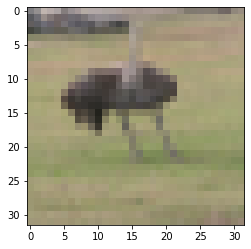

In [3]:
# Drawing sample . 
plt.imshow(X_train[42])

In [4]:
# Normalize the data.
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2,shuffle = True)

In [7]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(Y_train)
Y_train = encoder.transform(Y_train).toarray()
Y_test = encoder.transform(Y_test).toarray()
Y_val =  encoder.transform(Y_val).toarray()

## Data Augmentation

In [8]:
from keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(horizontal_flip=True, width_shift_range=0.05,
                             height_shift_range=0.05)
aug.fit(X_train)

# Implement ResNet-18 model

In [9]:
# load classes from python file resnet_18.py
from drive.MyDrive.app.resnet_18 import ResNet18

model = ResNet18(10)
model.build(input_shape = (None,32,32,3))

#use categorical_crossentropy since the label is one-hot encoded
from keras.optimizers import SGD

# opt = SGD(learning_rate=0.1,momentum=0.9,decay = 1e-04) #parameters suggested by He [1]
model.compile(optimizer = "adam",loss='categorical_crossentropy', metrics=["accuracy"]) 
model.summary()

Cause: mangled names are not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: mangled names are not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model: "res_net18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  9472      
_________________________________________________________________
batch_normalization (BatchNo multiple                  256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
resnet_block (ResnetBlock)   multiple                  74368     
_________________________________________________________________
resnet_block_1 (ResnetBlock) multiple          

In [10]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(patience= 8, restore_best_weights=True, monitor="val_accuracy")

STEPS = len(X_train) / 256
history = model.fit(aug.flow(X_train,Y_train,batch_size = 256), steps_per_epoch=STEPS, 
                    batch_size = 256, epochs=50, validation_data=(X_val, Y_val),callbacks=[es])

Epoch 1/50
156/156 [==============================] - 55s 127ms/step - loss: 1.9648 - accuracy: 0.3575 - val_loss: 1.8932 - val_accuracy: 0.3562
Epoch 2/50
156/156 [==============================] - 19s 119ms/step - loss: 1.2821 - accuracy: 0.5342 - val_loss: 1.3060 - val_accuracy: 0.5242
Epoch 3/50
156/156 [==============================] - 19s 120ms/step - loss: 1.1018 - accuracy: 0.6016 - val_loss: 1.3686 - val_accuracy: 0.5162
Epoch 4/50
156/156 [==============================] - 19s 119ms/step - loss: 0.9937 - accuracy: 0.6470 - val_loss: 1.2465 - val_accuracy: 0.5799
Epoch 5/50
156/156 [==============================] - 19s 119ms/step - loss: 0.8978 - accuracy: 0.6792 - val_loss: 1.3103 - val_accuracy: 0.5746
Epoch 6/50
156/156 [==============================] - 19s 119ms/step - loss: 0.8349 - accuracy: 0.7070 - val_loss: 1.1349 - val_accuracy: 0.6176
Epoch 7/50
156/156 [==============================] - 19s 120ms/step - loss: 0.7500 - accuracy: 0.7336 - val_loss: 1.0622 - val_ac

# Evaluation

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


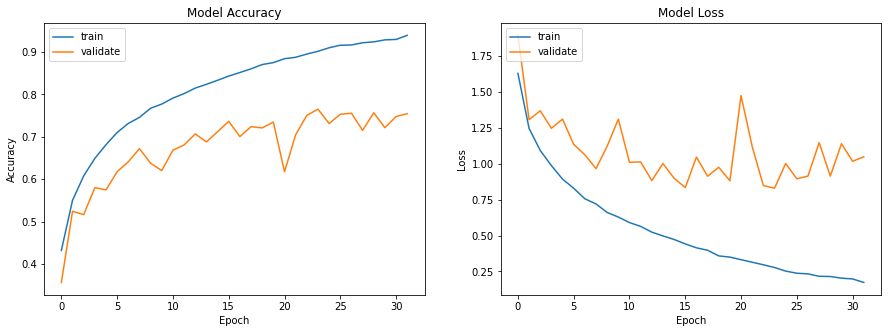

In [11]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())
plotmodelhistory(history)


In [12]:
## Evaluation

ModelLoss, ModelAccuracy = model.evaluate(X_train, Y_train)

print('Model Loss is {}'.format(ModelLoss))
print('Model Accuracy is {}'.format(ModelAccuracy))

1250/1250 [==============================] - 9s 7ms/step - loss: 0.2431 - accuracy: 0.9136
Model Loss is 0.24306030571460724
Model Accuracy is 0.9135500192642212


In [13]:
ModelLoss, ModelAccuracy = model.evaluate(X_test, Y_test)

print('Model Loss is {}'.format(ModelLoss))
print('Model Accuracy is {}'.format(ModelAccuracy))

313/313 [==============================] - 2s 7ms/step - loss: 0.8709 - accuracy: 0.7523
Model Loss is 0.8708649277687073
Model Accuracy is 0.7523000240325928


# Save Model's Weights

In [14]:
# save model's weights
model.save_weights('drive/MyDrive/app/resnet_18.h5')